In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

import tensorflow as tf 

In [2]:
W_true = 2
b_true = 0.5

In [3]:
x = np.linspace(0, 3, 130)

y = W_true * x + b_true + np.random.randn(*x.shape) * 0.5

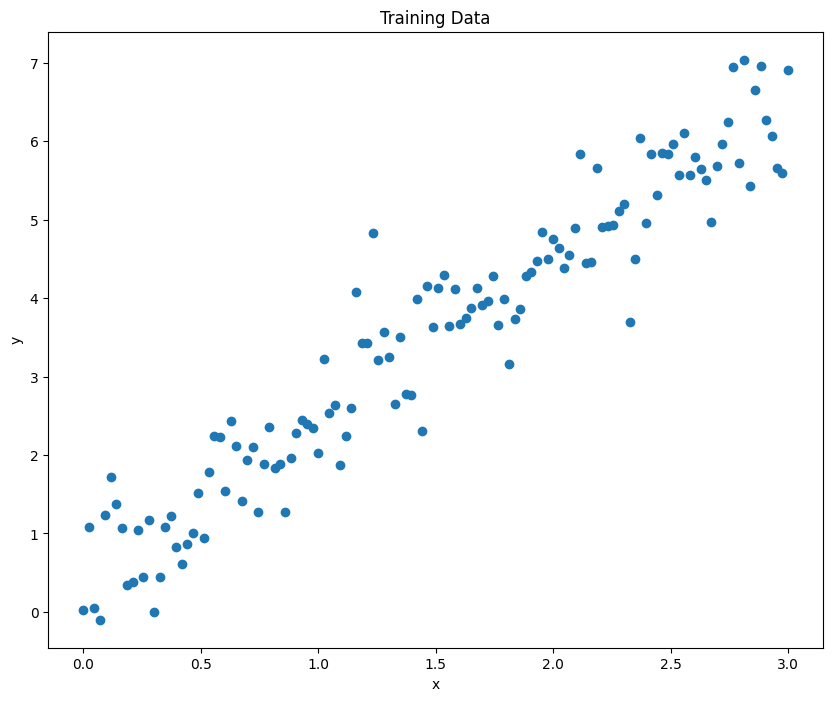

In [4]:
plt.figure(figsize=(10, 8))

plt.scatter(x, y)

plt.xlabel('x') 
plt.ylabel('y') 

plt.title("Training Data") 
plt.show() 

Defining the model

In [5]:
class LinearModel:

    def __init__(self):
        self.weight = tf.Variable(np.random.randn(), name = "W")
        self.bias = tf.Variable(np.random.randn(), name = "b") 
        
    def __call__(self, x):
        return self.weight * x + self.bias

Defining the loss function

In [6]:
def loss(y, y_pred):
    return tf.reduce_mean(tf.square(y - y_pred))

Training function

In [7]:
def train(linear_model, x, y, lr = 0.01):
    
    with tf.GradientTape() as tape:
        
        y_pred = linear_model(x)
        
        current_loss = loss(y, y_pred)

    d_weight, d_bias = tape.gradient(current_loss, 
                                     [linear_model.weight, linear_model.bias])
    
    linear_model.weight.assign_sub(lr * d_weight)
    linear_model.bias.assign_sub(lr * d_bias)

### Note:
    First give epochs = 10, show the graph, then epochs = 50 and epochs = 100 show the graph each time

In [8]:
linear_model = LinearModel()

weights, biases = [], []

epochs = 100

lr = 0.15

In [9]:
for epoch_count in range(epochs):
    
    weights.append(linear_model.weight.numpy()) 
    biases.append(linear_model.bias.numpy())
    
    real_loss = loss(y, linear_model(x))
    
    train(linear_model, x, y, lr = 0.12)
    
    print(f"Epoch count {epoch_count}: Loss value: {real_loss.numpy()}")

Epoch count 0: Loss value: 36.16059494018555
Epoch count 1: Loss value: 0.5638875961303711
Epoch count 2: Loss value: 0.3032132387161255
Epoch count 3: Loss value: 0.29905545711517334
Epoch count 4: Loss value: 0.2969704270362854
Epoch count 5: Loss value: 0.29509273171424866
Epoch count 6: Loss value: 0.2933908700942993
Epoch count 7: Loss value: 0.29184845089912415
Epoch count 8: Loss value: 0.2904503047466278
Epoch count 9: Loss value: 0.28918302059173584
Epoch count 10: Loss value: 0.2880344092845917
Epoch count 11: Loss value: 0.2869933247566223
Epoch count 12: Loss value: 0.28604966402053833
Epoch count 13: Loss value: 0.2851943373680115
Epoch count 14: Loss value: 0.28441905975341797
Epoch count 15: Loss value: 0.2837164103984833
Epoch count 16: Loss value: 0.28307950496673584
Epoch count 17: Loss value: 0.2825022041797638
Epoch count 18: Loss value: 0.281978964805603
Epoch count 19: Loss value: 0.28150469064712524
Epoch count 20: Loss value: 0.2810748517513275
Epoch count 21: L

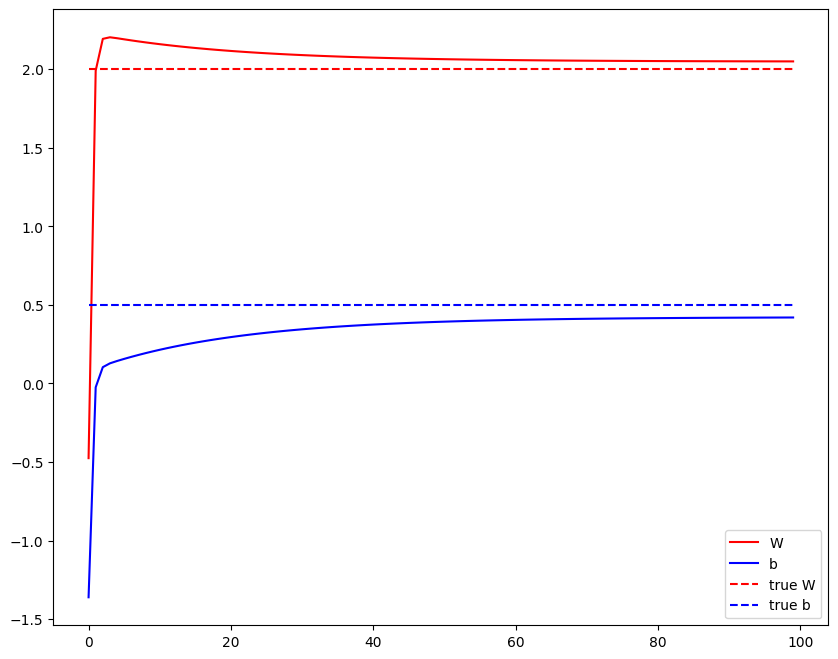

In [10]:
plt.figure(figsize=(10, 8))

plt.plot(range(epochs), weights, 'r', range(epochs), biases, 'b')
plt.plot([W_true] * epochs, 'r--', [b_true] * epochs, 'b--')

plt.legend(['W', 'b', 'true W', 'true b'])
plt.show()

In [11]:
linear_model.weight.numpy(), linear_model.bias.numpy()

(2.0500803, 0.41996437)

In [12]:
rmse = loss(y, linear_model(x))

rmse.numpy()

0.27691403

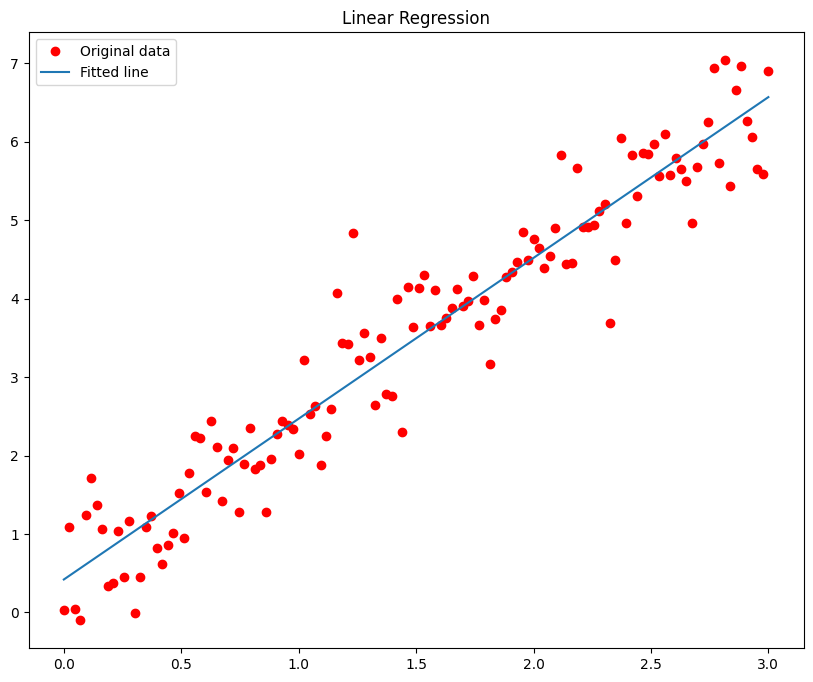

In [13]:
plt.figure(figsize=(10, 8))

plt.plot(x, y, 'ro', label = 'Original data') 
plt.plot(x, linear_model(x), label = 'Fitted line') 

plt.title('Linear Regression') 

plt.legend() 
plt.show() 

### Using model.fit()

In [14]:
from tensorflow import keras
from tensorflow.keras import layers

In [15]:
x.shape, y.shape

((130,), (130,))

In [16]:
x = pd.DataFrame(x, columns = ['x'])     
y = pd.DataFrame(y, columns = ['y'])     

In [17]:
x.head()

,x
0,0.000000
1,0.023256
2,0.046512
3,0.069767
4,0.093023


In [18]:
y.head()

,y
0,0.028384
1,1.087791
2,0.047376
3,-0.099986
4,1.237031


In [19]:
x.shape, y.shape

((130, 1), (130, 1))

In [20]:
model = keras.Sequential([layers.Dense(1, input_shape = (1,), activation = 'linear')])

optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001)

model.compile(loss = 'mse', metrics = ['mse'], optimizer = optimizer)

In [21]:
model.fit(x, y, epochs = 100)

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 33.5812 - mse: 33.5812
Epoch 2/100
5/5 [==============================] - 0s 1ms/step - loss: 31.5408 - mse: 31.5408
Epoch 3/100
5/5 [==============================] - 0s 1ms/step - loss: 29.2266 - mse: 29.2266
Epoch 4/100
5/5 [==============================] - 0s 750us/step - loss: 26.9376 - mse: 26.9376
Epoch 5/100
5/5 [==============================] - 0s 750us/step - loss: 25.1777 - mse: 25.1777
Epoch 6/100
5/5 [==============================] - 0s 1ms/step - loss: 23.4434 - mse: 23.4434
Epoch 7/100
5/5 [==============================] - 0s 751us/step - loss: 21.6887 - mse: 21.6887
Epoch 8/100
5/5 [==============================] - 0s 1ms/step - loss: 19.9372 - mse: 19.9372
Epoch 9/100
5/5 [==============================] - 0s 1ms/step - loss: 18.5545 - mse: 18.5545
Epoch 10/100
5/5 [==============================] - 0s 1ms/step - loss: 17.4046 - mse: 17.4046
Epoch 11/100
5/5 [==============================] - 0

In [22]:
y_pred = model.predict(x)

5/5 [==============================] - 0s 758us/step


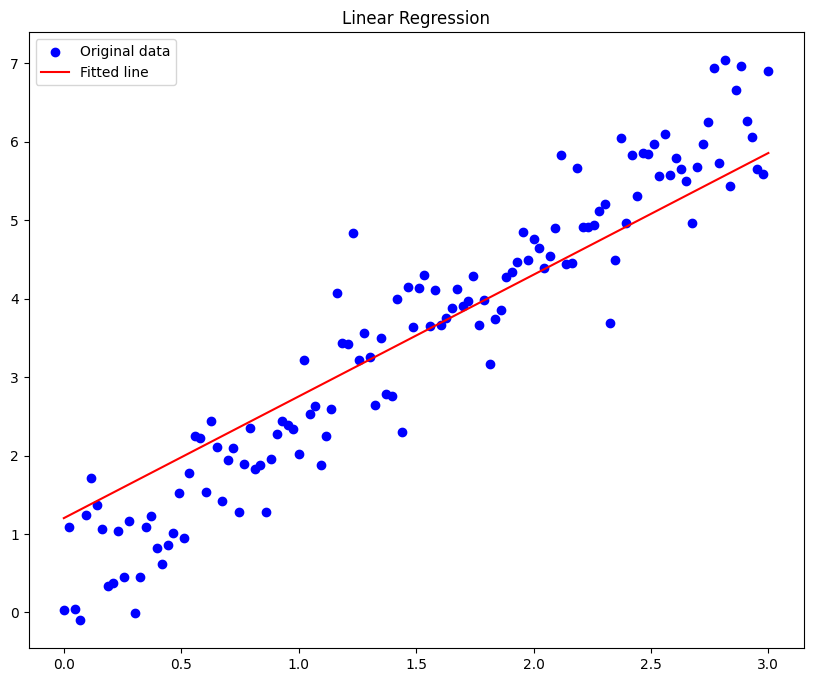

In [23]:
plt.figure(figsize=(10, 8))

plt.scatter(x, y, c = 'blue', label = 'Original data')
plt.plot(x, y_pred, color = 'r', label = 'Fitted line')

plt.title('Linear Regression') 
plt.legend() 
plt.show()